# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [55]:
library(tidyverse)

In [56]:
wages <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-09-05/wages.csv')
head(wages)

Rows: 1247 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): facet
dbl (8): year, sample_size, wage, at_cap, union_wage, nonunion_wage, union_w...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,sample_size,wage,at_cap,union_wage,nonunion_wage,union_wage_premium_raw,union_wage_premium_adjusted,facet
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1973,39774,3.963343,0.001110298,4.613008,3.754528,0.2286519,0.1717432,all wage and salary workers
1974,37966,4.258988,0.001568906,5.021364,4.019072,0.2493840,0.1761086,all wage and salary workers
1975,37812,4.622152,0.002267337,5.428930,4.386672,0.2375963,0.1858174,all wage and salary workers
1976,37888,4.914102,0.002900983,5.835837,4.646127,0.2560648,0.1967221,all wage and salary workers
1977,46591,5.235753,0.003558032,6.375394,4.874814,0.3078231,0.2088755,all wage and salary workers
1978,44577,5.578954,0.003885182,6.773647,5.212551,0.2994879,0.2013529,all wage and salary workers


`geom_smooth()` using formula = 'y ~ x'


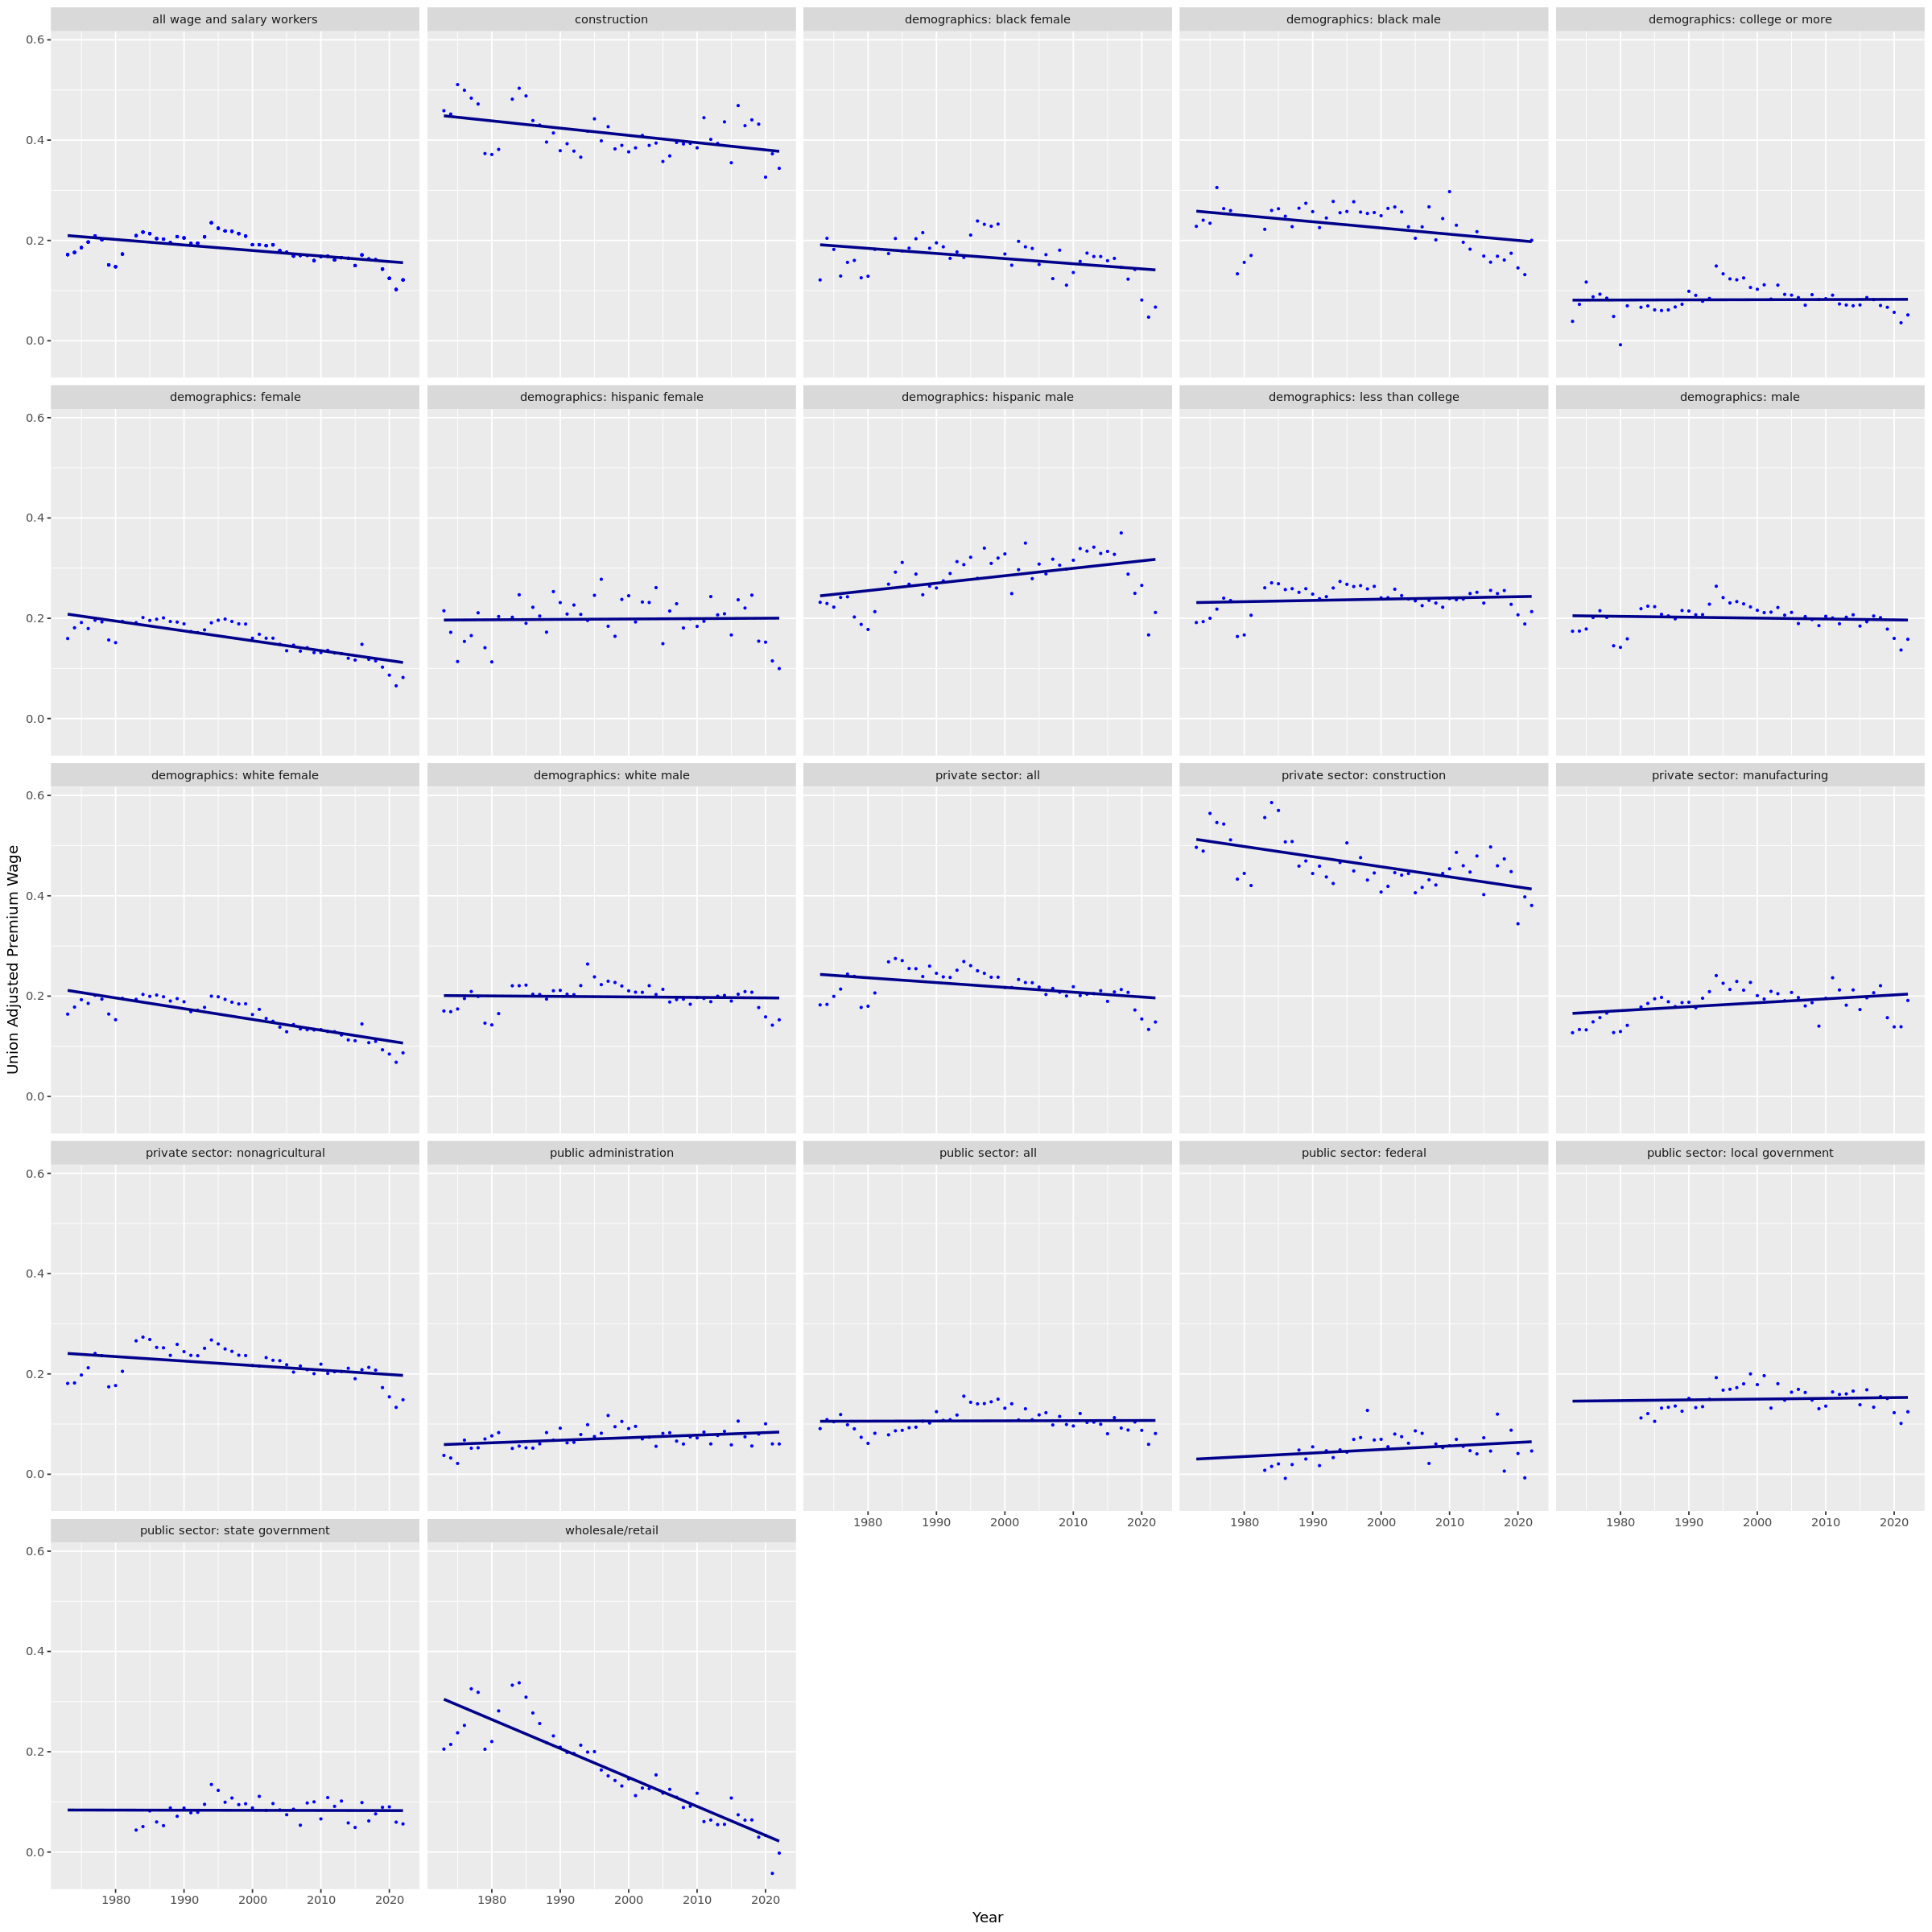

In [83]:
options(repr.plot.width=20, repr.plot.height=20)

p = ggplot(wages, aes(x = year, y = union_wage_premium_adjusted)) + 
    geom_point(size = 0.5, color = 'blue') + 
    geom_smooth(method=lm, se=FALSE, fullrange=TRUE, color = "darkblue") +
    facet_wrap(~facet) +
    labs(x = "Year", y = "Union Adjusted Premium Wage")
p

The following scatterplots express the relationship between year and premium adjusted union wages from year 1970 to 2020, sorted by sector or demographic row. The analysis shows a stable relationship between most sectors barring negative relationships for wholesale/retail and both private and public sector construction.

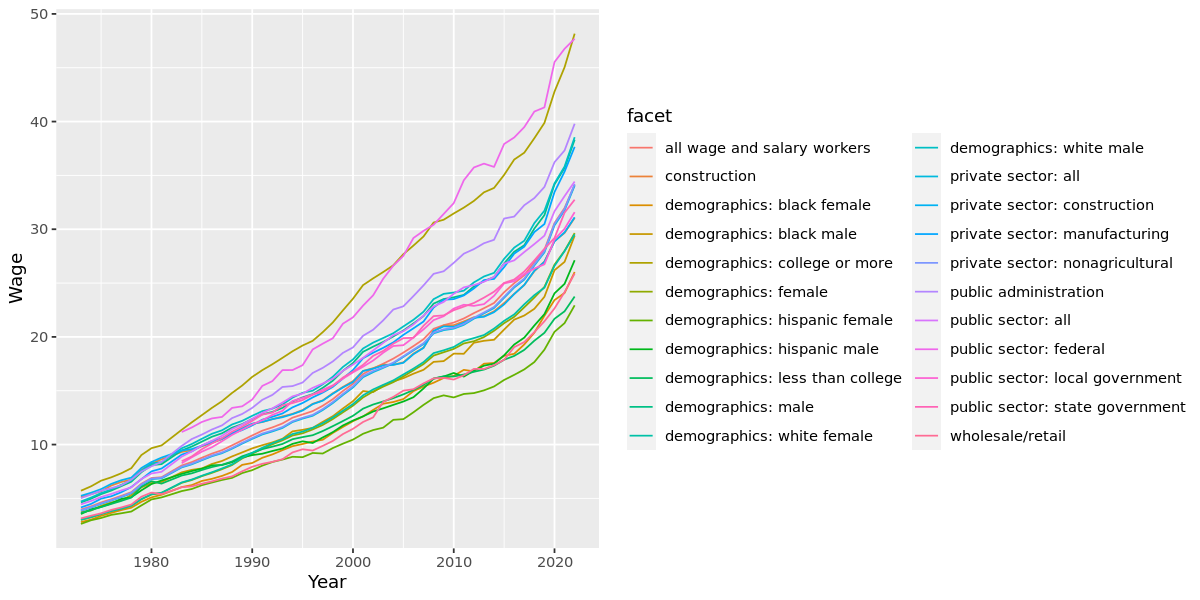

In [82]:
options(repr.plot.width=10, repr.plot.height=5)

p = ggplot(wages, aes(x = year, y = wage, color = facet, group = facet)) + 
    geom_line() +
    labs(x = "Year", y = "Wage")
p

This line plot shows a positive relationship between year and wage. From the late 21st century to 2020, there has been a steady increase in wage across all sectors and demographic groups according to this data.

# A tibble: 22 × 3
   facet                           average_wage facet_sorted                   
   <chr>                                  <dbl> <fct>                          
 1 demographics: hispanic female           10.6 demographics: hispanic female  
 2 wholesale/retail                        11.7 wholesale/retail               
 3 demographics: black female              11.9 demographics: black female     
 4 demographics: less than college         12.2 demographics: less than college
 5 demographics: hispanic male             12.3 demographics: hispanic male    
 6 demographics: female                    13.4 demographics: female           
 7 demographics: white female              13.5 demographics: white female     
 8 demographics: black male                13.6 demographics: black male       
 9 private sector: all                     15.2 private sector: all            
10 private sector: nonagricultural         15.3 private sector: nonagricultural
# ℹ 12 more rows


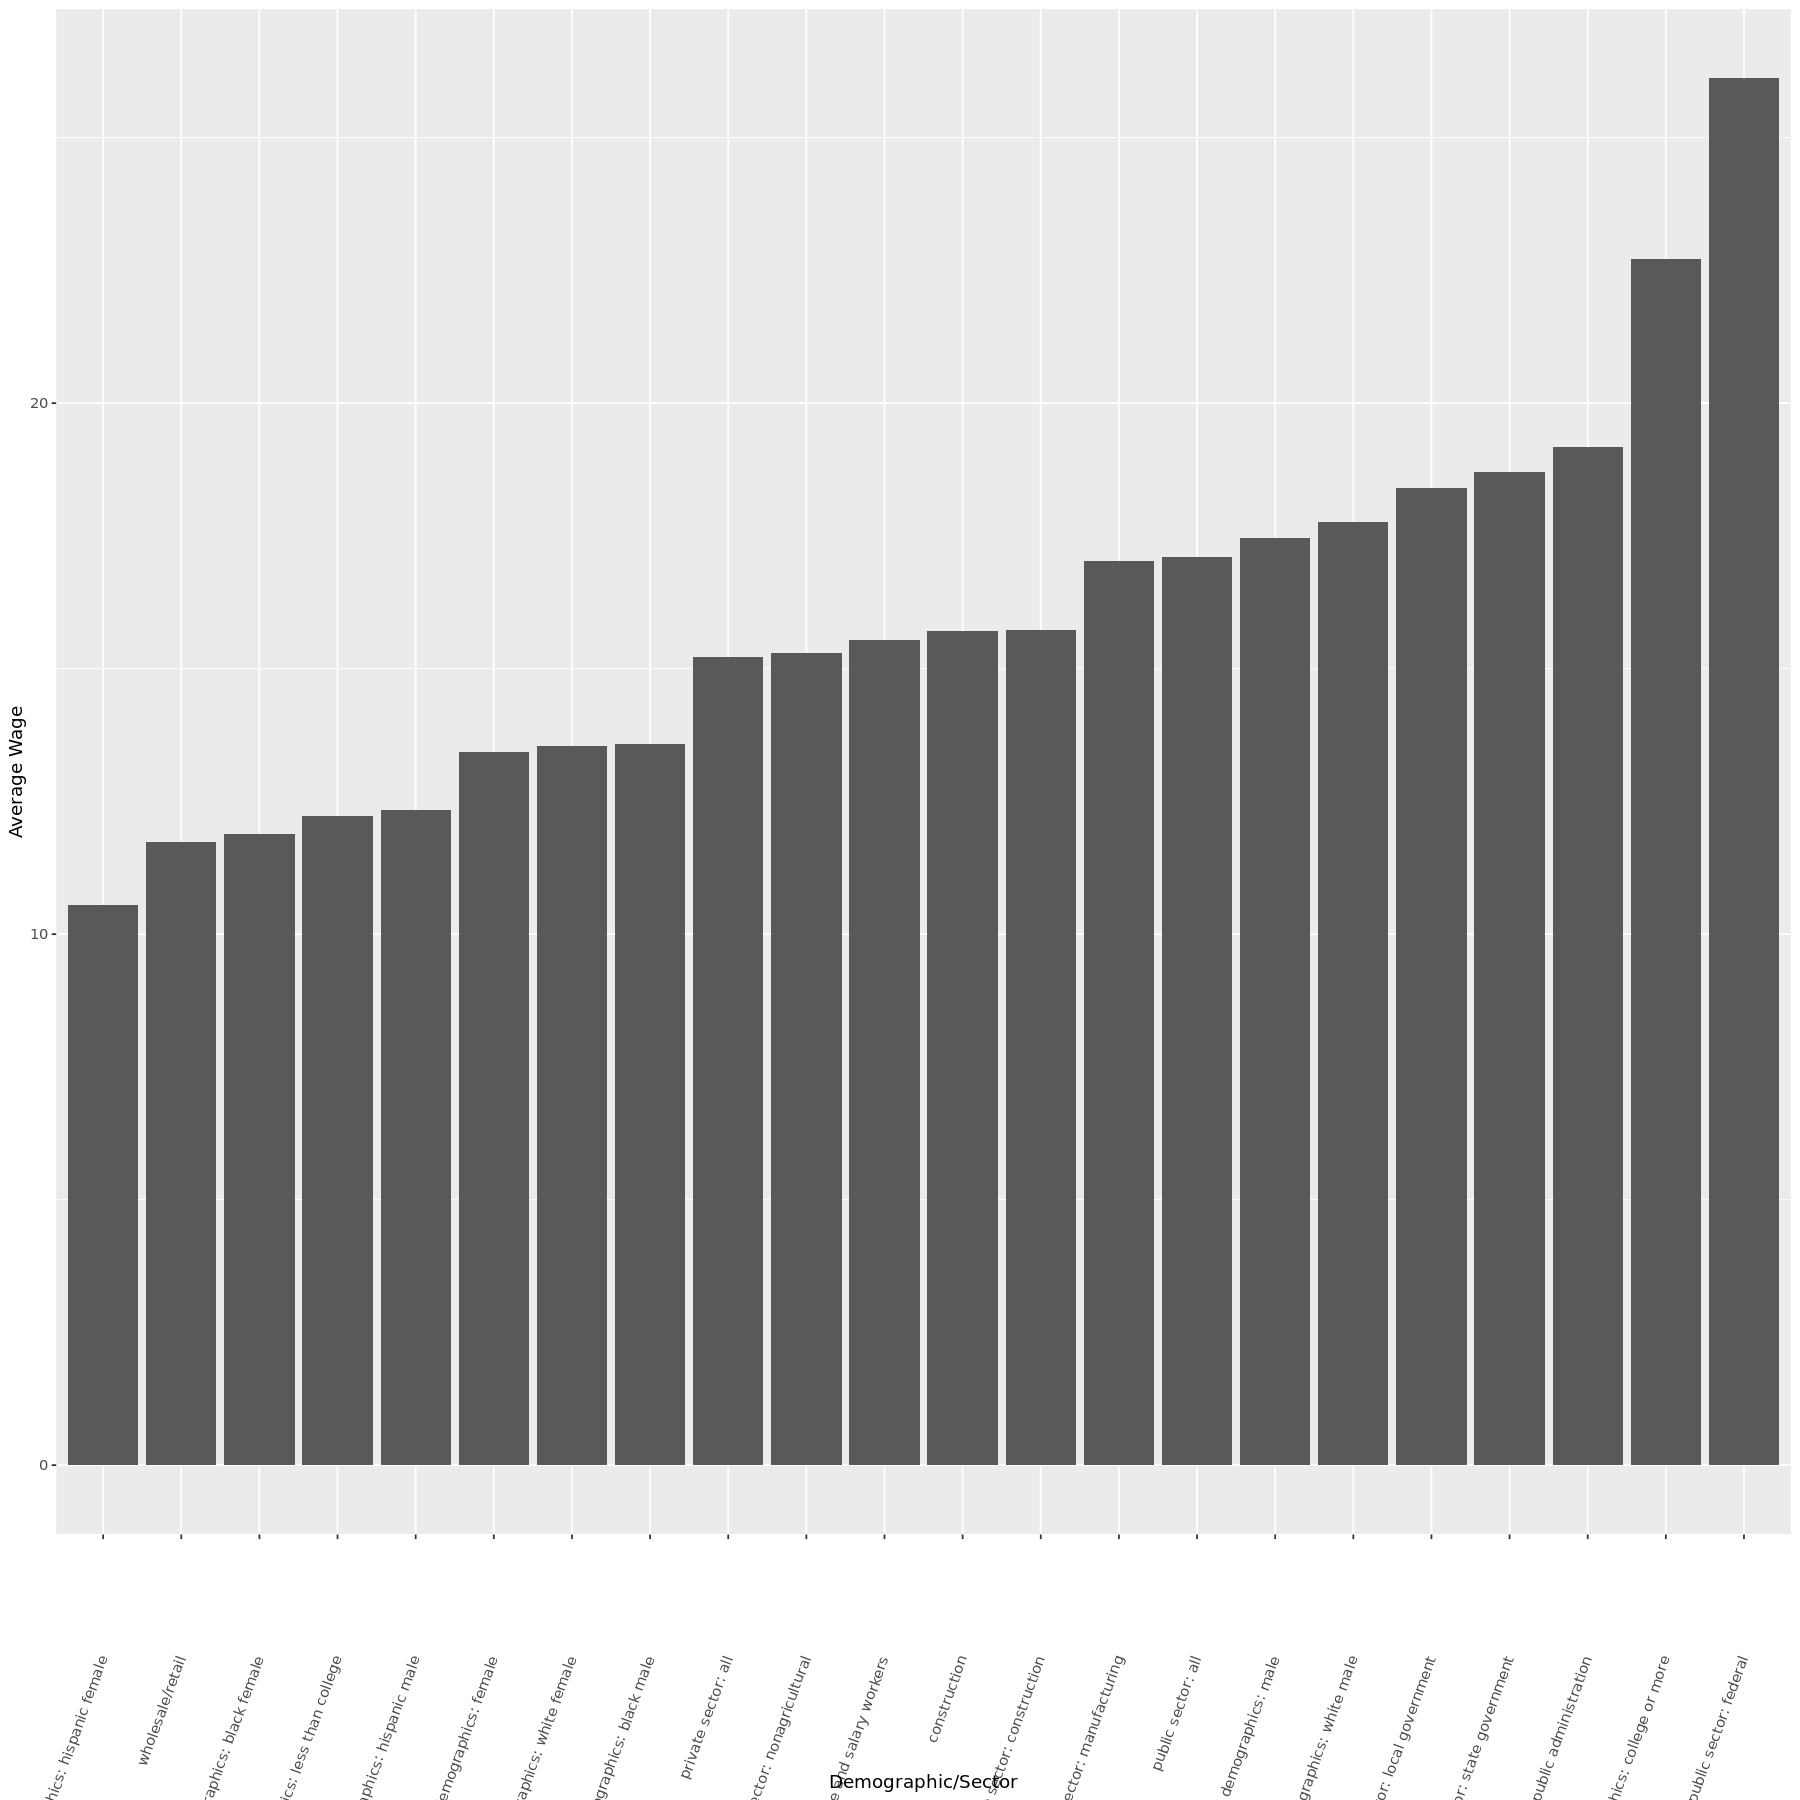

In [81]:
options(repr.plot.width=15, repr.plot.height=15)

grouped_wage = wages |>
    group_by(facet) |>
    summarize(average_wage = mean(wage)) |>
    arrange((average_wage)) |>
    mutate(facet_sorted = fct_inorder(facet)) |>
    print()

p = ggplot(grouped_wage, aes(x = facet_sorted, y = average_wage)) + 
    geom_col() +
    labs(x = "Demographic/Sector", y = "Average Wage") 
    
p + theme(axis.text.x = element_text(angle = 70, vjust = 0.5, hjust=1))

This table displays the average wage per group from the late 21st century to 2020 after grouping the data by facet using the group_by() function and summarizing wage using the summarize() and mean() functions. Using this table, we can see in ascending order how wages generally fall across sectors/demographics from the past few decades. The bar chart displays in a more visual manner the comparison between average wages. Using fct_inorder, we can see the average wages in ascending order from left to right.